# 3.3 DESAFIO COMPUTACIONAL 


O Capítulo 3 traz o exemplo do processo de análise descritiva de dados aplicado aos atributos Mês, Dia, DMC e DC da base Fires. Para este desafio, realize o mesmo processo para os atributos X, Y, Temp e UR da base Fires. Realize as etapas do processo de forma similar ao exemplo exposto no livro.



#**Importação das dependências**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#**Importação da base**

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv', sep=',')

# **Análise exploratória**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# **Análise descritiva**


## Funções auxiliares na análise descritiva

In [6]:
def encaixotamento(column):
  bins = pd.cut(df[column], bins=5)
  return bins.value_counts()

def amplitude(column):
  return (df[column].max() - df[column].min()) / 5

def ponto_medio(lim_inferior, lim_superior):
  list = []
  for x in range(5):    
    list.append((lim_inferior[x] + lim_superior[x]) / 2)
  return list

classes = [1,2,3,4,5]

def frequencia_relativa(freq_absoluta):
  freq = []
  for x in range(5):
     y = (freq_absoluta[x] / 517) * 100
     freq.append(y.round(2))
  return freq


def create(column, classes, limite_inicial, limite_superior):
  resum_temp = pd.DataFrame()
  freq_absoluta = encaixotamento(column)
  media = ponto_medio(limite_inicial, limite_superior)
  resum_temp['CLASSE'] = classes
  resum_temp['LIMITE INFERIOR'] = limite_inicial
  resum_temp['LIMITE SUPERIOR'] = limite_superior
  resum_temp['FREQUENCIA ABSOLUTA'] = [freq_absoluta[0], freq_absoluta[1], freq_absoluta[2], freq_absoluta[3], freq_absoluta[4]]
  resum_temp['FREQUENCIA RELATIVA'] = frequencia_relativa(resum_temp['FREQUENCIA ABSOLUTA'])
  resum_temp['PONTO MÉDIO'] = media
  return resum_temp


## Análise descritiva do atributos **DMC**

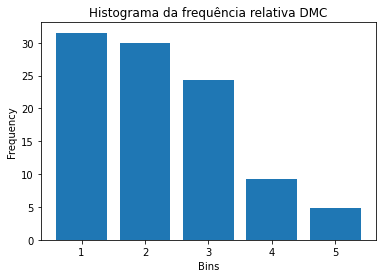

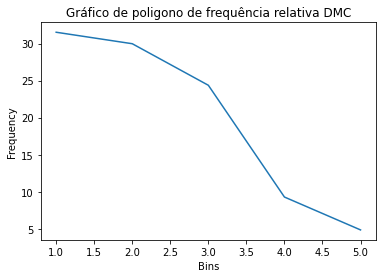

,CLASSE,LIMITE INFERIOR,LIMITE SUPERIOR,FREQUENCIA ABSOLUTA,FREQUENCIA RELATIVA,PONTO MÉDIO
0,1,0.81,59.14,163,31.53,29.975
1,2,59.14,117.18,155,29.98,88.160
2,3,117.18,175.22,126,24.37,146.200
3,4,175.22,233.26,48,9.28,204.240
4,5,233.26,291.30,25,4.84,262.280


In [7]:
amplitude('DMC')
encaixotamento('DMC')
resum_dmc = pd.DataFrame()
resum_dmc = create('DMC', classes, [0.81, 59.14, 117.18, 175.22, 233.26], [ 59.14, 117.18, 175.22, 233.26, 291.3])

plt.bar(resum_dmc['CLASSE'], resum_dmc['FREQUENCIA RELATIVA'], align='center')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histograma da frequência relativa DMC')
plt.show()

plt.plot(resum_dmc['CLASSE'], resum_dmc['FREQUENCIA RELATIVA'])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Gráfico de poligono de frequência relativa DMC')
plt.show()


resum_dmc

## Análise descritiva do atributos **TEMP**

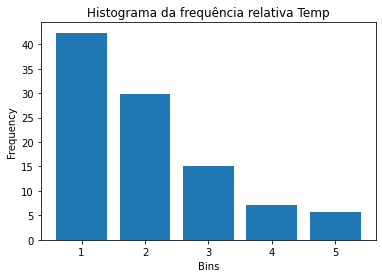

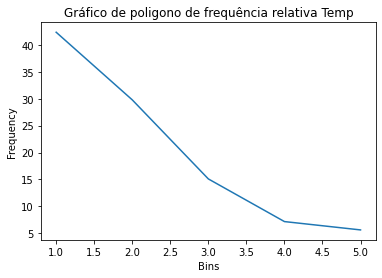

,CLASSE,LIMITE INFERIOR,LIMITE SUPERIOR,FREQUENCIA ABSOLUTA,FREQUENCIA RELATIVA,PONTO MÉDIO
0,1,2.169,8.42,219,42.36,5.2945
1,2,8.420,14.64,154,29.79,11.5300
2,3,14.640,20.86,78,15.09,17.7500
3,4,20.860,27.08,37,7.16,23.9700
4,5,27.080,33.30,29,5.61,30.1900


In [8]:
amplitude('temp')
encaixotamento('temp')
resum_temp = pd.DataFrame()
resum_temp = create('temp', classes, [2.169, 8.42, 14.64, 20.86, 27.08], [8.42, 14.64, 20.86, 27.08, 33.3])

plt.bar(resum_temp['CLASSE'], resum_temp['FREQUENCIA RELATIVA'], align='center')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histograma da frequência relativa Temp')
plt.show()

plt.plot(resum_temp['CLASSE'], resum_temp['FREQUENCIA RELATIVA'])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Gráfico de poligono de frequência relativa Temp')
plt.show()

resum_temp


## Análise descritiva do atributos **Y**

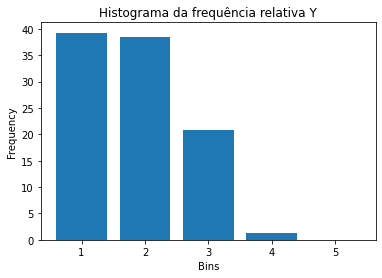

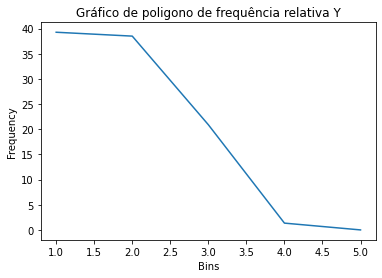

,CLASSE,LIMITE INFERIOR,LIMITE SUPERIOR,FREQUENCIA ABSOLUTA,FREQUENCIA RELATIVA,PONTO MÉDIO
0,1,1.993,3.4,203,39.26,2.6965
1,2,3.400,4.8,199,38.49,4.1000
2,3,4.800,6.2,108,20.89,5.5000
3,4,6.200,7.6,7,1.35,6.9000
4,5,7.600,9.0,0,0.00,8.3000


In [10]:
amplitude('Y')
encaixotamento('Y')
resum_y = pd.DataFrame()
resum_y = create('Y', classes, [1.993, 3.4, 4.8, 6.2, 7.6], [3.4, 4.8, 6.2, 7.6, 9.0])

plt.bar(resum_y['CLASSE'], resum_y['FREQUENCIA RELATIVA'], align='center')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histograma da frequência relativa Y')
plt.show()

plt.plot(resum_y['CLASSE'], resum_y['FREQUENCIA RELATIVA'])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Gráfico de poligono de frequência relativa Y')
plt.show()

resum_y


## Análise descritiva do atributos **X**

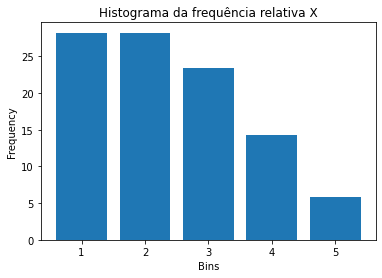

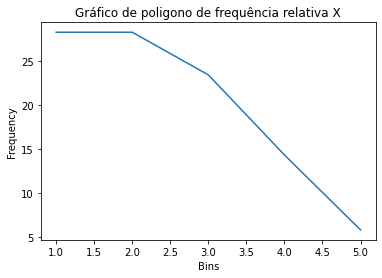

,CLASSE,LIMITE INFERIOR,LIMITE SUPERIOR,FREQUENCIA ABSOLUTA,FREQUENCIA RELATIVA,PONTO MÉDIO
0,1,0.992,2.6,146,28.24,1.796
1,2,2.600,4.2,146,28.24,3.400
2,3,4.200,5.8,121,23.40,5.000
3,4,5.800,7.4,74,14.31,6.600
4,5,7.400,9.0,30,5.80,8.200


In [11]:
amplitude('X')
encaixotamento('X')
resum_x = pd.DataFrame()
resum_x = create('X', classes,  [0.992, 2.6, 4.2, 5.8, 7.4], [2.6, 4.2, 5.8, 7.4, 9.0])

plt.bar(resum_x['CLASSE'], resum_x['FREQUENCIA RELATIVA'], align='center')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histograma da frequência relativa X')
plt.show()

plt.plot(resum_x['CLASSE'], resum_x['FREQUENCIA RELATIVA'])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Gráfico de poligono de frequência relativa X')
plt.show()

resum_x

## Análise descritiva do atributos **RH**

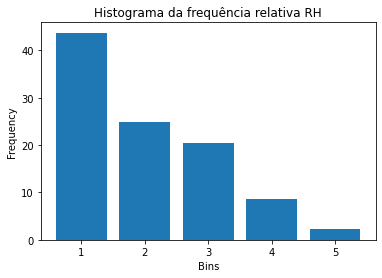

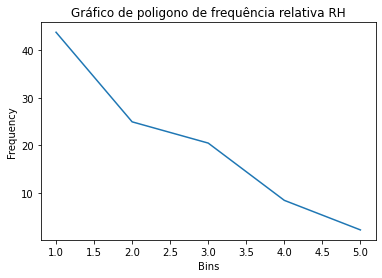

,CLASSE,LIMITE INFERIOR,LIMITE SUPERIOR,FREQUENCIA ABSOLUTA,FREQUENCIA RELATIVA,PONTO MÉDIO
0,1,14.915,32.0,226,43.71,23.4575
1,2,32.000,49.0,129,24.95,40.5000
2,3,49.000,66.0,106,20.50,57.5000
3,4,66.000,83.0,44,8.51,74.5000
4,5,83.000,100.0,12,2.32,91.5000


In [12]:
amplitude('RH')
encaixotamento('RH')
resum_rh = pd.DataFrame()
resum_rh = create('RH', classes, [14.915, 32.0, 49.0, 66.0, 83.0], [ 32.0, 49.0, 66.0, 83.0, 100.0])

plt.bar(resum_rh['CLASSE'], resum_rh['FREQUENCIA RELATIVA'], align='center')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histograma da frequência relativa RH')
plt.show()

plt.plot(resum_rh['CLASSE'], resum_rh['FREQUENCIA RELATIVA'])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Gráfico de poligono de frequência relativa RH')
plt.show()

resum_rh

## Análises associativas

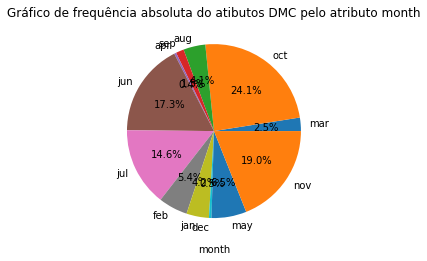

OBS: A partir da análise, notamos que podemos usar a técnica do encaixotamento por bimestres para ficar mais facil de análisar a frequencia do atributo DMC


In [15]:
x = df.groupby("month").mean()

plt.pie(x['DMC'], autopct='%1.1f%%', labels=df["month"].unique())
plt.xlabel('month')
plt.title('Gráfico de frequência absoluta do atibutos DMC pelo atributo month')
plt.show()
print('OBS: A partir da análise, notamos que podemos usar a técnica do encaixotamento por bimestres para ficar mais facil de análisar a frequencia do atributo DMC')


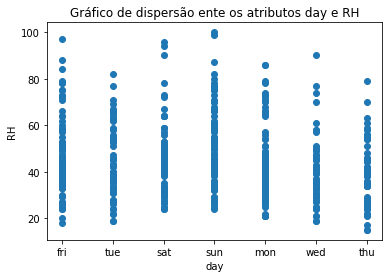

In [ ]:
plt.scatter(df['day'], df['RH'])
plt.xlabel('day')
plt.ylabel('RH')
plt.title('Gráfico de dispersão ente os atributos day e RH')
plt.show()

## Medidas de Resumo

In [ ]:
resumo_medidas = df.describe()
resumo_medidas


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Análise através do grafico bloxpot

Text(1, 7.0, '7.00')

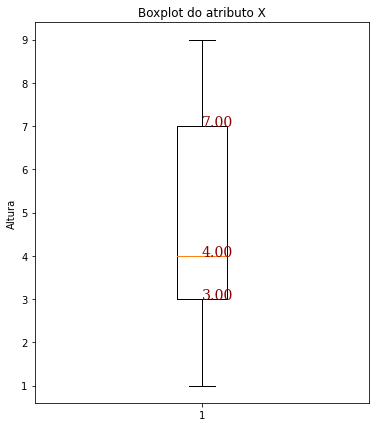

In [ ]:
q1 = resumo_medidas['X']['25%']
mediana = resumo_medidas['X']['50%']
q2 = resumo_medidas['X']['75%']

s_q1 = "{0:.2f}".format(q1)
s_mediana = "{0:.2f}".format(mediana)
s_q2 = "{0:.2f}".format(q2)

font_1 = {'family': 'serif', 'color': 'darkred', 'size':'14'}

plt.figure(figsize=(6, 7))
plt.boxplot(df['X'])
plt.title('Boxplot do atributo X')
plt.ylabel('Altura')
plt.text(1, q1, s_q1, fontdict=font_1)
plt.text(1, mediana, s_mediana, fontdict=font_1)
plt.text(1, q2, s_q2, fontdict=font_1)
